# Sentiment Analysis 

## Set up

In [1]:
# set up
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.core.display import display, HTML

C:\Users\EmmaC\AppData\Local\Temp\ipykernel_18660\158841178.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
# import text files
# these are grabbed from the "text analysis files" folder on UVA Box

LIB = pd.read_csv('../../data/Text Analysis Files/LIB.csv')
TOKEN = pd.read_csv('../../data/Text Analysis Files/TOKEN.csv')
DOC = pd.read_csv('../../data/Text Analysis Files/DOC.csv')
TFIDF = pd.read_csv('../../data/Text Analysis Files/TFIDF.csv')

In [3]:
# TOKEN

In [4]:
#survey 

In [5]:
# add assignment to TOKEN dataframe
# 0 - control, 1 - treatment
survey = pd.read_excel('../../data/survey.xlsx')
survey.rename(columns = {'studyid':'speaker_id'}, inplace = True)
#survey = survey[['studyid', 'assignment']]

# join to TOKEN
# applying merge with more parameters
TOKEN = TOKEN.merge(survey[['speaker_id', 'assignment']], on = 'speaker_id', how = 'left')
TOKEN

,speaker_id,line_num,sent_num,token_num,pos_tuple,pos,token_str,term_str,term_id,assignment
0,201,1,0,0,"('Good', 'JJ')",JJ,Good,good,542,1
1,201,1,0,1,"('morning', 'NN')",NN,morning,morning,828,1
2,201,1,0,2,"('class', 'NN')",NN,class,class,231,1
3,201,1,1,0,"('I', 'PRP')",PRP,I,i,621,1
4,201,1,1,1,"(""'m"", 'VBP')",VBP,'m,m,764,1
...,...,...,...,...,...,...,...,...,...,...
48639,360,47,7,6,"('spent', 'VBD')",VBD,spent,spent,1246,0
48640,360,47,7,8,"('oh', 'UH')",UH,oh,oh,892,0
48641,360,47,7,10,"('it', 'PRP')",PRP,it,it,677,0
48642,360,47,7,11,"(""'s"", 'VBZ')",VBZ,'s,s,1132,0


## Individual Speaker Analysis

In [6]:
# get lexicon
## using NRC.csv

NRC = pd.read_csv('NRC.csv')
NRC.columns = [col.replace('nrc_','') for col in NRC.columns]
NRC

,word,sentiment
0,abacus,trust
1,abandon,fear
2,abandon,negative
3,abandon,sadness
4,abandoned,anger
...,...,...
13896,zest,anticipation
13897,zest,joy
13898,zest,positive
13899,zest,trust


In [7]:
# change table so the sentiments are rows with values 0 or 1 
NRC = pd.crosstab(NRC['word'], NRC['sentiment']).reset_index().rename_axis(None, axis=1)
NRC=NRC.rename(columns = {'word':'term_str'})
NRC = NRC.iloc[1:]
#NRC = NRC.astype(object)
NRC

,term_str,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
1,abacus,0,0,0,0,0,0,0,0,0,1
2,abandon,0,0,0,1,0,1,0,1,0,0
3,abandoned,1,0,0,1,0,1,0,1,0,0
4,abandonment,1,0,0,1,0,1,0,1,1,0
5,abba,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6463,zany,0,0,0,0,0,0,0,0,1,0
6464,zeal,0,1,0,0,1,0,1,0,1,1
6465,zealous,0,0,0,0,1,0,1,0,0,1
6466,zest,0,1,0,0,1,0,1,0,0,1


In [8]:
# lexicon columns
emo_cols = "anger anticipation disgust fear joy sadness surprise trust polarity".split()

In [9]:
NRC['polarity'] = NRC.positive - NRC.negative

In [10]:
# #TOKEN
# NRC.dtypes

In [11]:
# TOKEN.dtypes

In [12]:
# TOKEN = TOKEN
# #TOKEN = TOKEN.astype(object)
# TOKEN

In [13]:
# TOKEN.term_str.dtype

In [14]:
# NRC.term_str.dtype

In [15]:
TOKEN_nrc = TOKEN.merge(NRC, on='term_str', how='left').set_index(['speaker_id','line_num','sent_num','token_num'])
TOKEN_nrc[emo_cols] = TOKEN_nrc[emo_cols].fillna(0)
TOKEN_nrc

pos_tuple  pos token_str  \
speaker_id line_num sent_num token_num                                     
201        1        0        0             ('Good', 'JJ')   JJ      Good   
                             1          ('morning', 'NN')   NN   morning   
                             2            ('class', 'NN')   NN     class   
                    1        0               ('I', 'PRP')  PRP         I   
                             1              ("'m", 'VBP')  VBP        'm   
...                                                   ...  ...       ...   
360        47       7        6           ('spent', 'VBD')  VBD     spent   
                             8               ('oh', 'UH')   UH        oh   
                             10             ('it', 'PRP')  PRP        it   
                             11             ("'s", 'VBZ')  VBZ        's   
                             12            ('over', 'RP')   RP      over   

                                       term_str  term_id  assignment  anger  \
speaker_id line_num sent_num token_num                                        
201        1        0        0             good      542           1    0.0   
                             1          morning      828           1    0.0   
                             2            class      231           1    0.0   
                    1        0                i      621           1    0.0   
                             1                m      764           1    0.0   
...                                         ...      ...         ...    ...   
360        47       7        6            spent     1246           0    0.0   
                             8               oh      892           0    0.0   
                             10              it      677           0    0.0   
                             11               s     1132           0    0.0   
                             12            over      927           0    0.0   

                                        anticipation  disgust  fear  joy  \
speaker_id line_num sent_num token_num                                     
201        1        0        0                   1.0      0.0   0.0  1.0   
                             1                   0.0      0.0   0.0  0.0   
                             2                   0.0      0.0   0.0  0.0   
                    1        0                   0.0      0.0   0.0  0.0   
                             1                   0.0      0.0   0.0  0.0   
...                                              ...      ...   ...  ...   
360        47       7        6                   0.0      0.0   0.0  0.0   
                             8                   0.0      0.0   0.0  0.0   
                             10                  0.0      0.0   0.0  0.0   
                             11                  0.0      0.0   0.0  0.0   
                             12                  0.0      0.0   0.0  0.0   

                                        negative  positive  sadness  surprise  \
speaker_id line_num sent_num token_num                                          
201        1        0        0               0.0       1.0      0.0       1.0   
                             1               NaN       NaN      0.0       0.0   
                             2               NaN       NaN      0.0       0.0   
                    1        0               NaN       NaN      0.0       0.0   
                             1               NaN       NaN      0.0       0.0   
...                                          ...       ...      ...       ...   
360        47       7        6               1.0       0.0      0.0       0.0   
                             8               NaN       NaN      0.0       0.0   
                             10              NaN       NaN      0.0       0.0   
                             11              NaN       NaN      0.0       0.0   
                             12              NaN       NaN      0.0   

In [16]:
# save table
TOKEN_nrc.to_csv("words_with_sentiment.csv")

<AxesSubplot:>

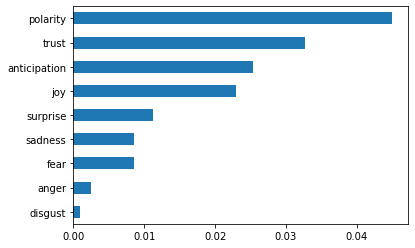

In [17]:
# highest level - all videos together
TOKEN_nrc[emo_cols].mean().sort_values().plot.barh()

<AxesSubplot:>

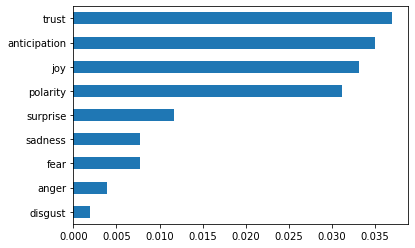

In [18]:
# separate by speaker 
# example - speaker id 201
speaker_201 = TOKEN_nrc.loc[[201]].copy()
speaker_201[emo_cols].mean().sort_values().plot.barh()

In [19]:
# save chart as image
# fig = speaker_201[emo_cols].mean().sort_values().plot.barh().get_figure()
# fig.savefig('bar_charts/test.png')

In [20]:
#TOKEN_nrc.reset_index().speaker_id.unique()

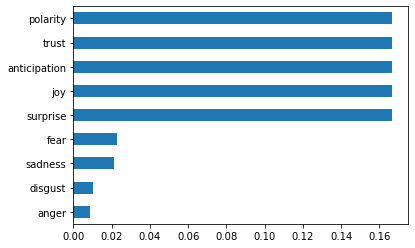

In [21]:
# separate by speaker
# full loop
# save plot.barh() to bar_charts folder
speakers = []
for speaker in TOKEN_nrc.reset_index().speaker_id.unique():
     exec('speaker_{} = TOKEN_nrc.loc[[{}]].copy()'.format(speaker,speaker))
     exec('speakers.append(\'speaker_{}\')'.format(speaker))
     exec('temp = speaker_{}[emo_cols].mean().sort_values().plot.barh().get_figure()'.format(speaker,speaker))
     exec('temp.savefig(\'sentiment_bar_charts/{}.png\')'.format(speaker))

In [22]:
# line chart visual
def plot_sentiments(df, emo='polarity'):
    FIG = dict(figsize=(25, 5), legend=True, fontsize=14, rot=45)
    df[emo].plot(**FIG)

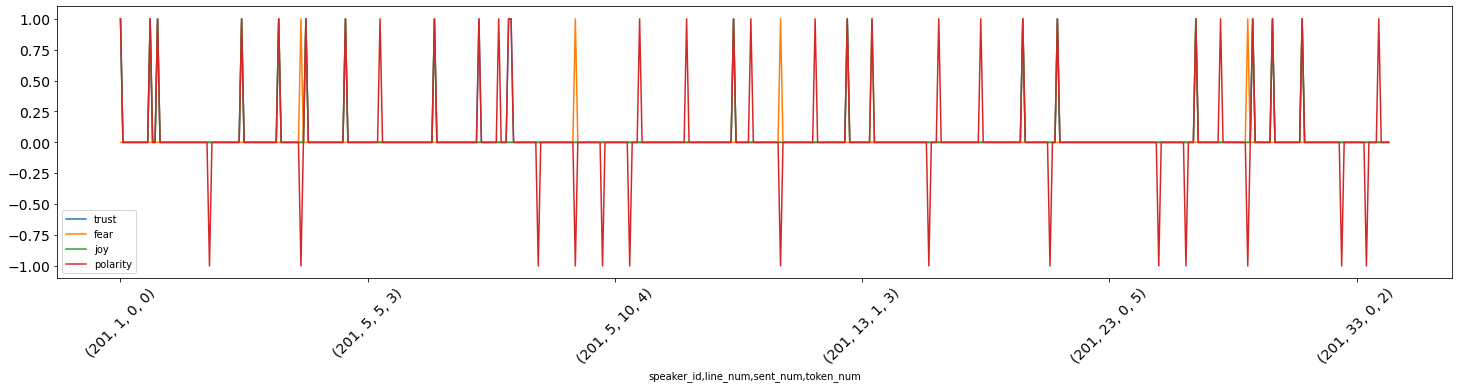

In [23]:
# separate by speaker
# example - speaker id 201

#### looks weird since its not a seamless timeline - would be better at the video level 
plot_sentiments(speaker_201, ['trust','fear','joy','polarity'])

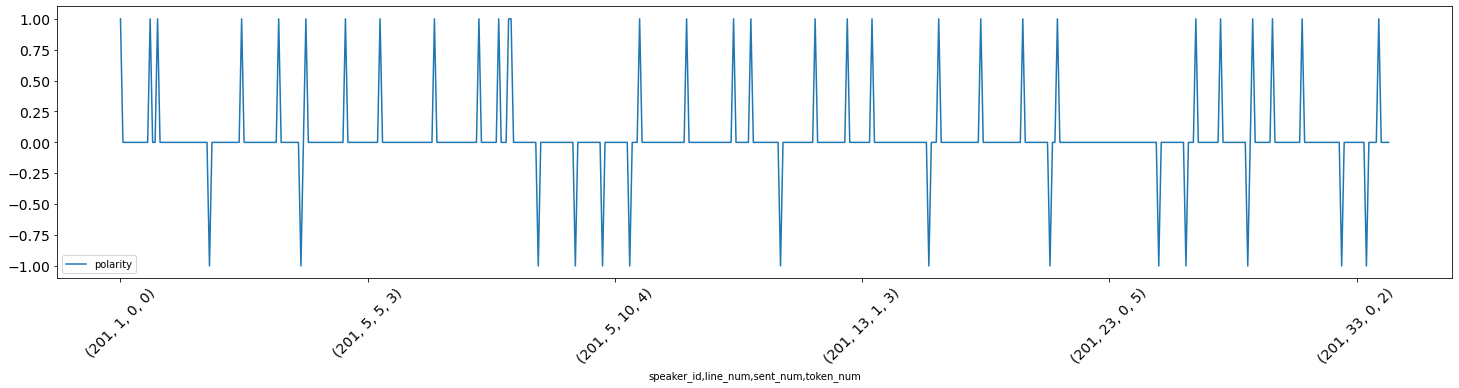

In [24]:
plot_sentiments(speaker_201, ['polarity'])

In [25]:
# Explore the sentiment in texts
# separating by speaker
# example - speaker 201
speaker_201['html'] =  speaker_201.apply(lambda x: "<span class='sent{}'>{}</span>".format(int(np.sign(x['polarity'])), x.token_str), 1)
speaker_201['html'].sample(10)

speaker_id  line_num  sent_num  token_num
201         23        1         1             <span class='sent0'>then</span>
            11        3         0               <span class='sent0'>Hi</span>
            3         2         14              <span class='sent0'>we</span>
            25        0         7               <span class='sent0'>it</span>
            15        2         2            <span class='sent0'>maybe</span>
            5         1         0             <span class='sent1'>Good</span>
                      6         9               <span class='sent0'>be</span>
            3         2         5               <span class='sent0'>na</span>
            25        3         0              <span class='sent0'>And</span>
            11        0         11              <span class='sent0'>ex</span>
Name: html, dtype: object

In [26]:
# group at the sentence level
speaker_201_sents = speaker_201.groupby(['speaker_id','line_num','sent_num'])[emo_cols].mean()
speaker_201_sents['sent_str'] = speaker_201.groupby(['speaker_id','line_num','sent_num']).term_str.apply(lambda x: x.str.cat(sep=' '))
speaker_201_sents['html_str'] = speaker_201.groupby(['speaker_id','line_num','sent_num']).html.apply(lambda x: x.str.cat(sep=' '))

In [27]:
def sample_sentences(df, dfname, sentiment):
    rows = []
    if len(df) < 20:
        num = len(df)
    else:
        num = 20
    for idx in df.sample(num).index:

        valence = round(df.loc[idx, sentiment], 4)     
        t = 0
        if valence > t: color = '#ccffcc'
        elif valence < t: color = '#ffcccc'
        else: color = '#f2f2f2'
        z=0
        rows.append("""<tr style="background-color:{0};padding:.5rem 1rem;font-size:110%;">
        <td>{1}</td><td>{3}</td><td width="400" style="text-align:left;">{2}</td>
        </tr>""".format(color, valence, df.loc[idx, 'html_str'], idx))

    #display(HTML('<style>#sample1 td{font-size:120%;vertical-align:top;} .sent-1{color:red;font-weight:bold;} .sent1{color:green;font-weight:bold;}</style>'))
    #display(HTML('<table id="sample1"><tr><th>Sentiment</th><th>ID</th><th width="600">Sentence</th></tr>'+''.join(rows)+'</table>'))
    
    filename = 'sentiment_example_texts/' + sentiment + '/' + dfname + '.html'
    with open(filename, 'w') as f:
        f.write('<style>#sample1 td{font-size:120%;vertical-align:top;} .sent-1{color:red;font-weight:bold;} .sent1{color:green;font-weight:bold;}</style>')
        f.write('<table id="sample1"><tr><th>Sentiment</th><th>ID</th><th width="600">Sentence</th></tr>'+''.join(rows)+'</table>')

In [28]:
#sample_sentences(speaker_201_sents, 'speaker_201', 'polarity')

In [29]:
#sample_sentences(speaker_201_sents, 'trust')

In [30]:
#sample_sentences(speaker_201_sents, 'fear')

In [31]:
# speaker_202['html'] =  speaker_201.apply(lambda x: "<span class='sent{}'>{}</span>".format(int(np.sign(x['polarity'])), x.token_str), 1)
# speaker_202['html'].sample(10)

In [32]:
# separate by speaker
# create the sents dataframe for each speaker
speaker_sents = []
for speaker in speakers:
     #print(speaker)
     temp = 'apply(lambda x: "<span class=\'sent{}\'>{}</span>".format(int(np.sign(x[\'polarity\'])), x.token_str), 1)'
     exec('{}[\'html\'] = {}.{}'.format(speaker,speaker,temp))
     exec('{}_sents = {}.groupby([\'speaker_id\',\'line_num\',\'sent_num\'])[emo_cols].mean()'.format(speaker,speaker))
     exec('speaker_sents.append(\'{}_sents\')'.format(speaker))
     exec('{}_sents[\'sent_str\'] = {}.groupby([\'speaker_id\',\'line_num\',\'sent_num\']).term_str.apply(lambda x: x.str.cat(sep=\' \'))'.format(speaker,speaker))
     exec('{}_sents[\'html_str\'] = {}.groupby([\'speaker_id\',\'line_num\',\'sent_num\']).html.apply(lambda x: x.str.cat(sep=\' \'))'.format(speaker,speaker))

# create and save an example text from each speaker for each emotion

for speaker in speaker_sents:
    for emotion in emo_cols:
        # print(speaker)
        # print(emotion)
        s_id = speaker[:11]
        # print(id)
        exec('sample_sentences({}, \'{}\', \'{}\')'.format(speaker, s_id, emotion))
        



In [33]:
# using vader
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [34]:
#!pip install vaderSentiment

In [35]:
speaker_201_vader_cols = speaker_201_sents.sent_str.apply(analyser.polarity_scores).apply(lambda x: pd.Series(x))
speaker_201_vader = pd.concat([speaker_201_sents, speaker_201_vader_cols], axis=1)

<AxesSubplot:xlabel='speaker_id,line_num,sent_num'>

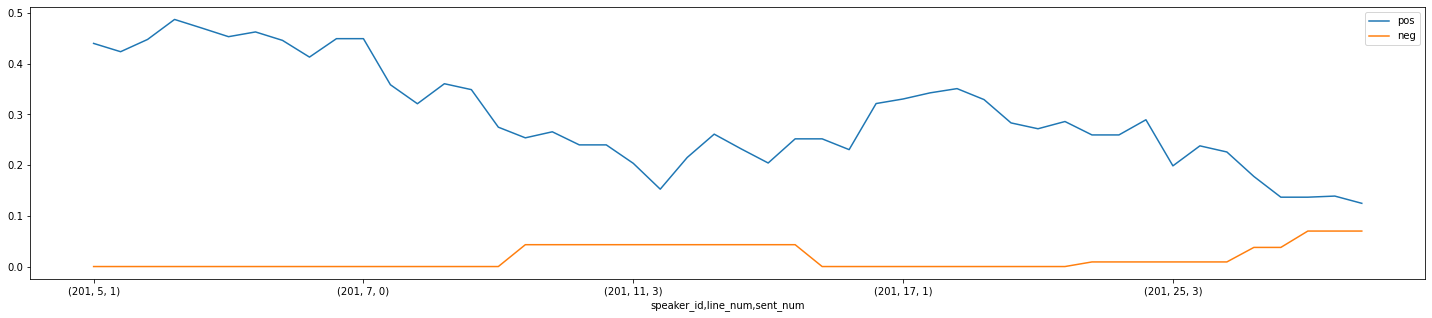

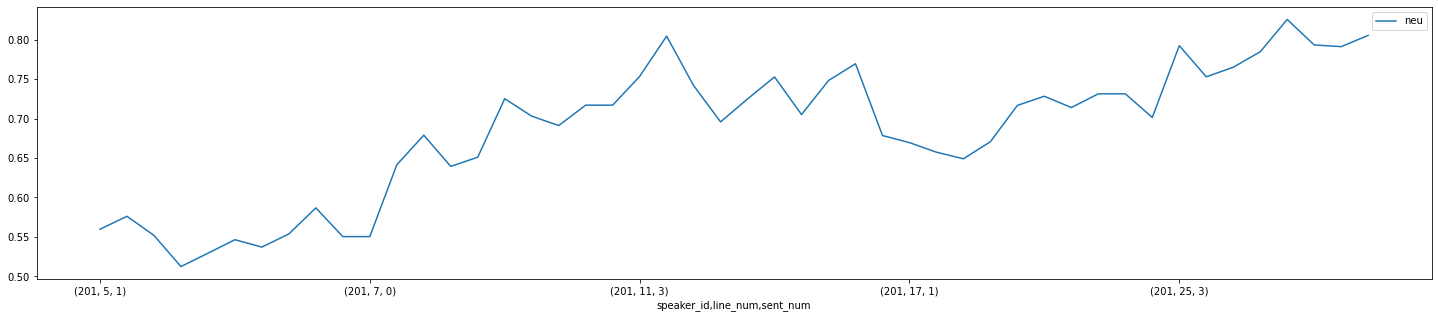

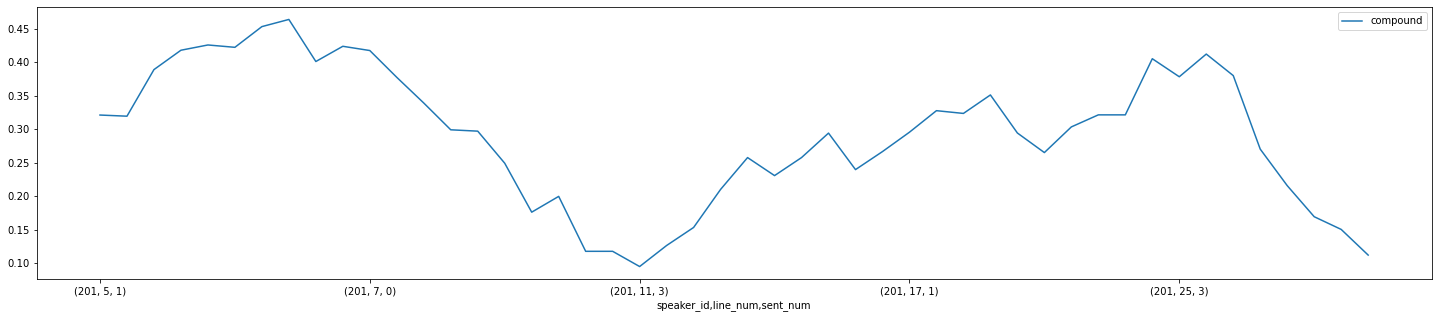

In [36]:
w = int(speaker_201_vader.shape[0] / 5)
speaker_201_vader[['pos','neg']].rolling(w).mean().plot(figsize=(25,5))
speaker_201_vader[['neu']].rolling(w).mean().plot(figsize=(25,5))
speaker_201_vader[['compound']].rolling(w).mean().plot(figsize=(25,5))

In [38]:
# # separate by speaker
# # full loop
# # save metrics to respective folders in vader_metrics folder

# for speaker in speakers:
#     exec('{}_vader_cols = {}_sents.sent_str.apply(analyser.polarity_scores).apply(lambda x: pd.Series(x))'.format(speaker, speaker))
#     exec('{}_vader = pd.concat([{}_sents, {}_vader_cols], axis=1)'.format(speaker,speaker,speaker))
#     exec('w = int({}_vader.shape[0] / 5)'.format(speaker))
    
#     # get pos_neg metric
#     exec('temp = {}_vader[[\'pos\', \'neg\']].rolling(w).mean().plot(figsize=(25,5)).get_figure()'.format(speaker))
#     exec('temp.savefig(\'vader_metrics/pos_neg\{}.png\')'.format(speaker))
    
#     # get neu metric
#     exec('temp = {}_vader[[\'neu\']].rolling(w).mean().plot(figsize=(25,5)).get_figure()'.format(speaker))
#     exec('temp.savefig(\'vader_metrics/neu/{}.png\')'.format(speaker))
    
#     # get compound metric
#     exec('temp = {}_vader[[\'compound\']].rolling(w).mean().plot(figsize=(25,5)).get_figure()'.format(speaker))
#     exec('temp.savefig(\'vader_metrics/compound/{}.png\')'.format(speaker))


#### Vader Interpretation
* The pos, neu, and neg scores are ratios for proportions of text that fall in each category (so these should all add up to be 1... or close to it with float operation)
* The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a ‘normalized, weighted composite score’ is accurate.

## Comparison Analysis

In [43]:
control = TOKEN_nrc[TOKEN_nrc['assignment'] == 0]
treatment = TOKEN_nrc[TOKEN_nrc['assignment'] == 1]
#control

<AxesSubplot:>

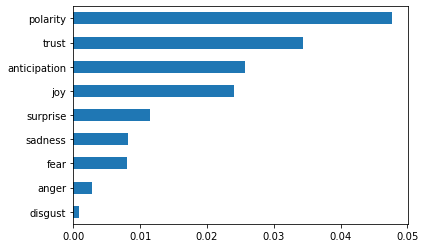

In [44]:
# sentiment bar chart for entire control group
control[emo_cols].mean().sort_values().plot.barh()

<AxesSubplot:>

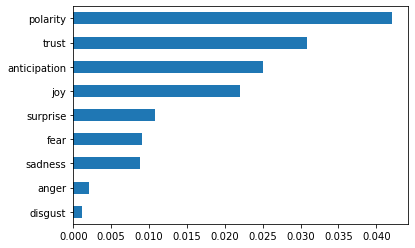

In [45]:
# sentiment bar chart for entire treatment group
treatment[emo_cols].mean().sort_values().plot.barh()

In [50]:
sentiment_comparison = pd.DataFrame(control[emo_cols].mean())
sentiment_comparison.rename(columns = {0:'control'}, inplace = True)
sentiment_comparison['treatment'] = treatment[emo_cols].mean()
sentiment_comparison

,control,treatment
anger,0.002724,0.002111
anticipation,0.025758,0.025041
disgust,0.000881,0.001098
fear,0.007972,0.009121
joy,0.023996,0.021959
sadness,0.008212,0.008868
surprise,0.011537,0.010810
trust,0.034331,0.030826
polarity,0.047711,0.042101


Interestingly enough, the control group that did not participate in the mindfulness study scored higher in polarity - was found to use more positive words. They also inspired more trust compared to the treatment group